In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

%matplotlib inline

## Correlation Function

\begin{align}
     \langle A B \rangle(\tau) 
         = \lim_{t_0 \rightarrow \infty} ~ \frac{1}{t_0} \int_0^{t_0} \mathrm d t ~ 
             A (t + \tau) ~ B (t)
\end{align}

In [2]:
def correlate(f1, f2):
    t0 = min(len(f1), len(f2))
    
    corr = np.zeros(t0)
    
    for t in range(t0):
        corr[t] = f1[t : t0] @ f2[: t0 - t]
        
    return corr / t0

In [3]:
# Reference data: fast + slow oscillation

t_max = 20
dt = 0.01
w1 = 1 / 0.13
w2 = 1/ 1

A1 = 1
A2 = 0.1

t = np.arange(0, t_max+dt, dt)

In [4]:
# noise
rand = np.random.RandomState(0)

noise = rand.randn(len(t)) * 2

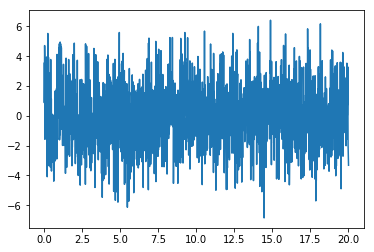

In [5]:
f = A1 * np.sin(w1 * t) + A2 * np.sin(w2 * t) + noise

plt.plot(t, f)

In [6]:
# mean and variance
print(f'{f.mean():.5f} +- {f.var():.5f}')

-0.01884 +- 4.29097


4.291325825548235


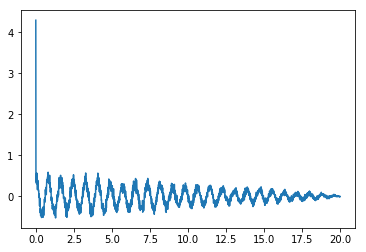

In [7]:
c = correlate(f, f)
plt.plot(t, c)

print(c[0])

4.291325825548235


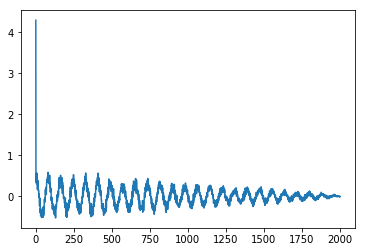

In [8]:
c2 = np.correlate(f, f, 'full')[len(f)-1:] / len(f)
plt.plot(c2)

print(c2[0])

In [9]:
all(c == c2)

True